In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.getcwd()


'C:\\Users\\swati\\Documents\\python datasets\\house-prices-advanced-regression-techniques'

In [3]:
housetrain=pd.read_csv("train.csv")

In [4]:
housetest=pd.read_csv("test.csv")

In [5]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
# Temporarily add dependent variable to test data
housetest['SalePrice']='test'

In [8]:
# Concatenate both dataframes for preprocessing
combinedf=pd.concat([housetrain,housetest],axis=0) # Row wise Concatenation

In [9]:
# Find Missing Values
pd.set_option("display.max_rows",81)
combinedf.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
BsmtHalfBath        2
BsmtFullBath        2
GarageArea          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
BsmtUnfSF           1
Electrical          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
TotalBsmtSF         1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

In [10]:
combinedf.isnull().sum().sort_values(ascending=False)/combinedf.shape[0]*100

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
FireplaceQu      48.646797
LotFrontage      16.649538
GarageFinish      5.447071
GarageQual        5.447071
GarageCond        5.447071
GarageYrBlt       5.447071
GarageType        5.378554
BsmtExposure      2.809181
BsmtCond          2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrType        0.822199
MasVnrArea        0.787941
MSZoning          0.137033
Functional        0.068517
Utilities         0.068517
BsmtHalfBath      0.068517
BsmtFullBath      0.068517
GarageArea        0.034258
BsmtFinSF1        0.034258
SaleType          0.034258
GarageCars        0.034258
BsmtUnfSF         0.034258
Electrical        0.034258
Exterior2nd       0.034258
Exterior1st       0.034258
KitchenQual       0.034258
TotalBsmtSF       0.034258
BsmtFinSF2        0.034258
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
Id                0.000000
B

In [11]:
# Split Data into Numeric and object cols
numericcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=['object'])

In [12]:
print(numericcols.shape)
print(objectcols.shape)

(2919, 37)
(2919, 44)


In [13]:
objectcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [14]:
objectcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [15]:
notavailable=['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond','PoolQC',
              'Fence', 'MiscFeature']

In [16]:
for col in notavailable:
    objectcols[col]=objectcols[col].fillna("NotAvailable")

In [17]:
for col in objectcols.columns:
    objectcols[col]=objectcols[col].fillna(objectcols[col].value_counts().idxmax())
    
# idxmax() identifies the class or index of maximum frequency in value_counts()

In [18]:
numericcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [19]:
numericcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [20]:
categorycols=numericcols[['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt',
                         'MoSold', 'YrSold']]

In [21]:
numericcols=numericcols.drop(['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd',
                              'GarageYrBlt','MoSold', 'YrSold'],axis=1)

In [22]:
for col in numericcols.columns:
    numericcols[col]=numericcols[col].fillna(numericcols[col].median())

In [23]:
for col in categorycols.columns:
    categorycols[col]=categorycols[col].fillna(categorycols[col].median())

In [24]:
# Correlation Analysis of Numeric Data
import seaborn as sns

<Axes: >

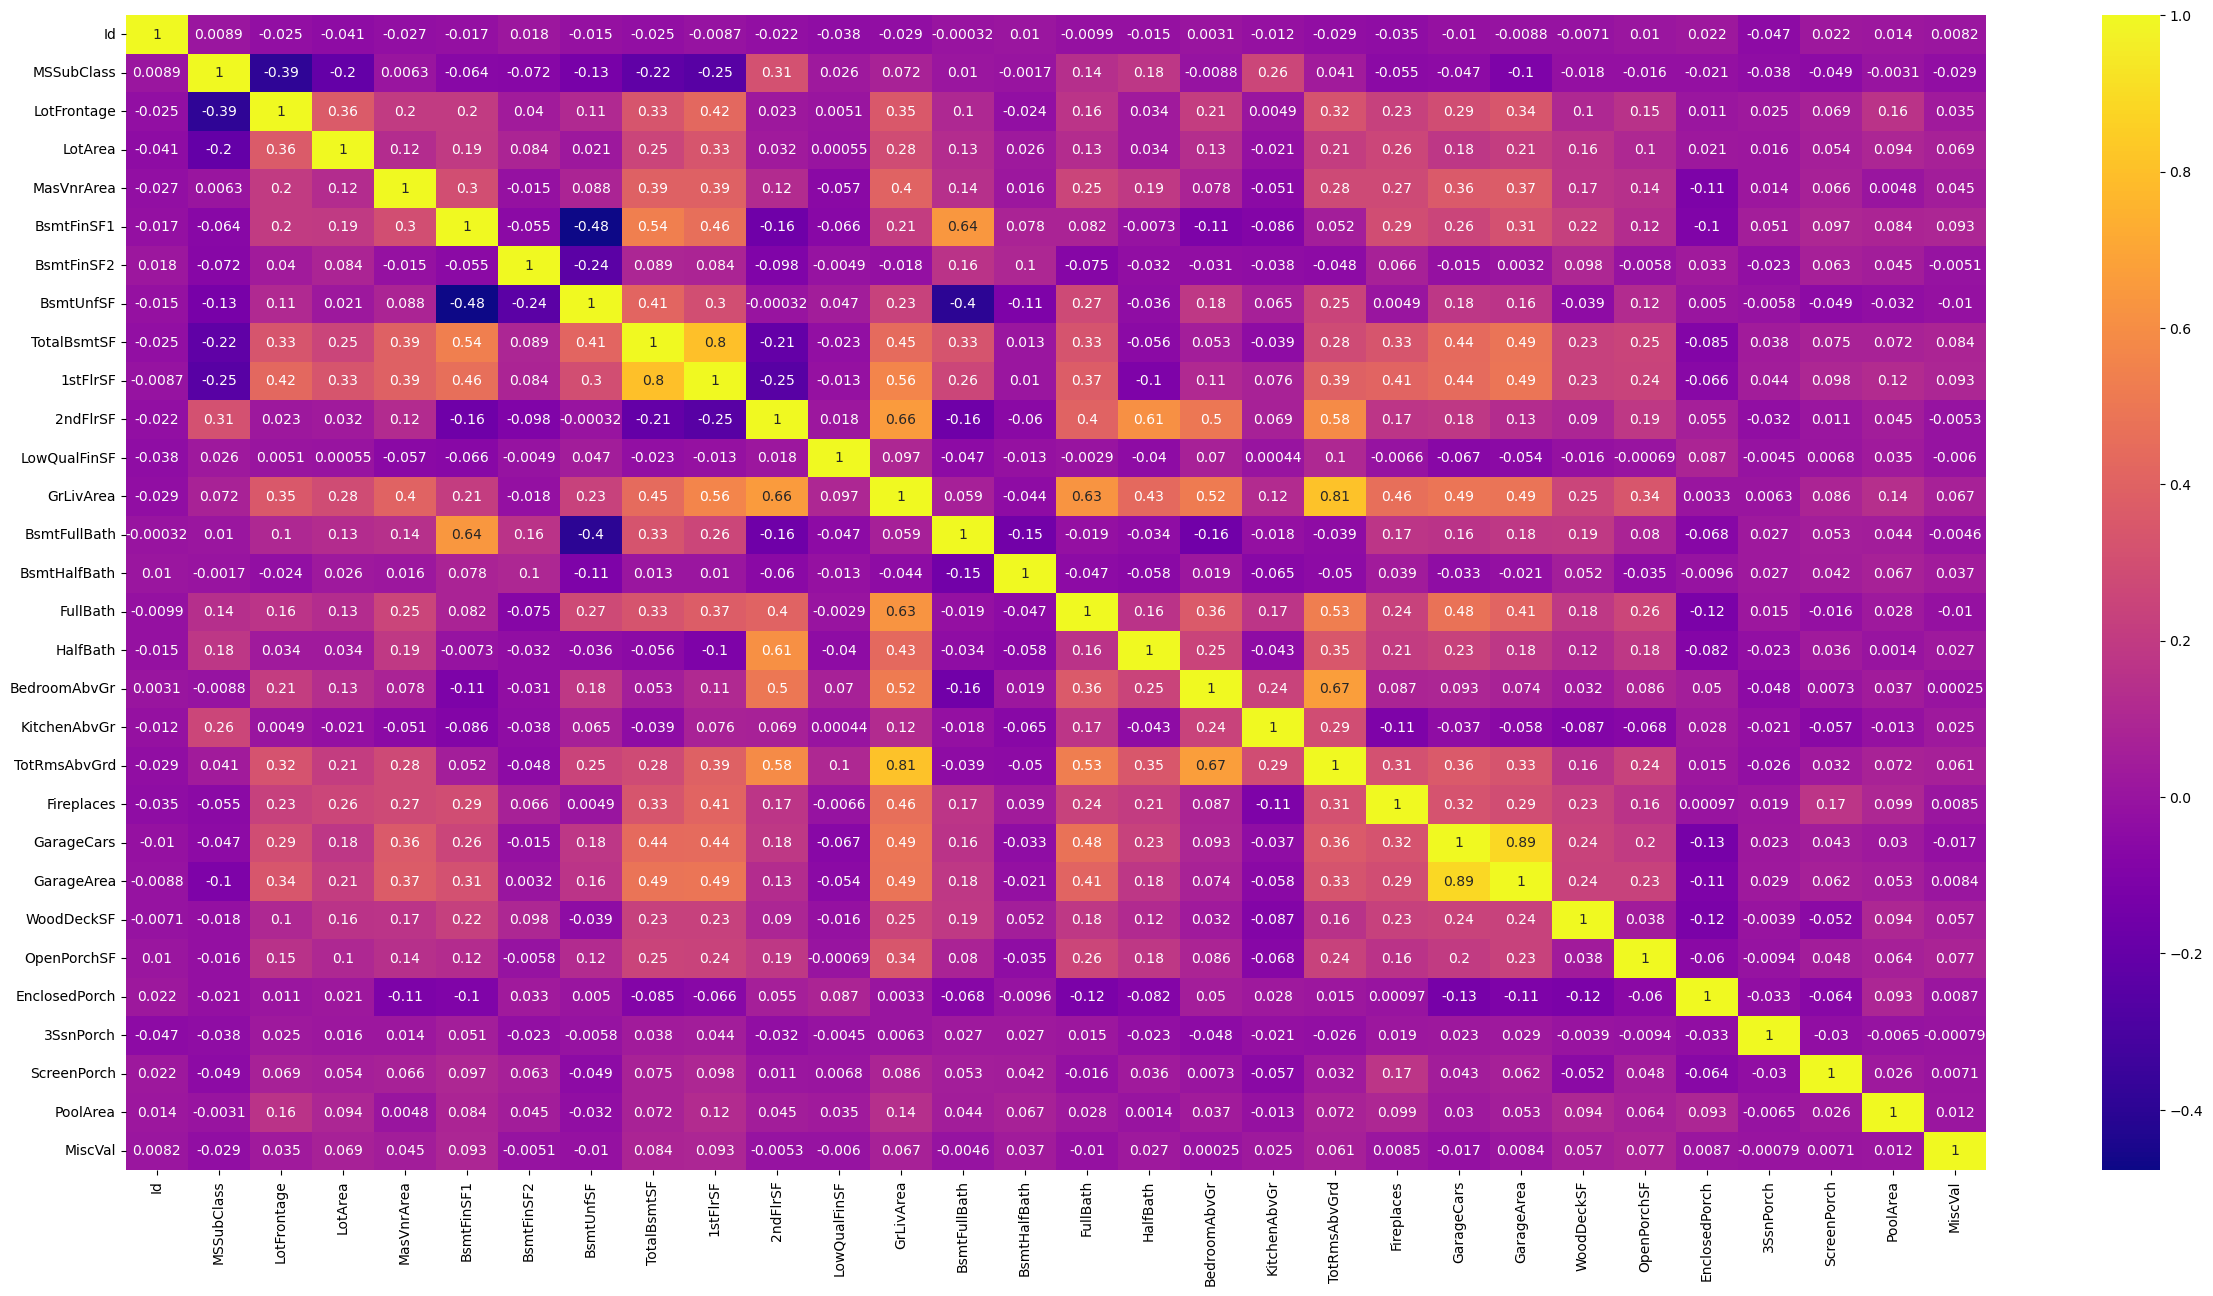

In [25]:
plt.figure(figsize=(30,15))
sns.heatmap(numericcols.corr(),annot=True,cmap="plasma")

In [26]:
numericcols['SalePrice']=objectcols.SalePrice

In [27]:
objectcols=objectcols.drop('SalePrice',axis=1)

In [28]:
objectcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
# Dummy Encode object cols and categorycols
from sklearn.preprocessing import LabelEncoder

In [30]:
object_dummy=objectcols.apply(LabelEncoder().fit_transform)

In [31]:
category_dummy=categorycols.apply(LabelEncoder().fit_transform)

In [32]:
combinedf_clean=pd.concat([numericcols,object_dummy,category_dummy],
                         axis=1)

In [33]:
# Split data back to train and test
housetrain_df=combinedf_clean[combinedf_clean.SalePrice!="test"]
housetest_df=combinedf_clean[combinedf_clean.SalePrice=="test"]

In [34]:
# Drop the dependentvariable from test data
housetest_df=housetest_df.drop('SalePrice',axis=1)

In [35]:
housetrain_df.head()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MiscFeature,SaleType,SaleCondition,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,1,60,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,...,1,8,4,6,4,110,53,94,1,2
1,2,20,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,...,1,8,4,5,7,83,26,67,4,1
2,3,60,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,...,1,8,4,6,4,108,52,92,8,2
3,4,70,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,...,1,8,0,6,4,25,20,89,1,0
4,5,60,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,...,1,8,4,7,4,107,50,91,11,2


In [36]:
housetrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [37]:
housetrain_df.shape

(1460, 81)

In [38]:
pd.set_option('display.max_columns',81)
housetrain_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.686301,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,3.028767,0.995890,0.993836,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,1.410274,1.075342,9.624658,10.339726,1.762329,2.539726,3.733562,1.396575,2.724658,3.691096,2.310274,3.150000,5.586986,1.036301,1.538356,0.934932,3.682192,2.339726,5.749315,3.087671,2.485616,1.876712,4.716438,4.763014,1.856164,2.991096,3.504795,1.069178,7.513014,3.770548,5.099315,4.575342,78.901370,34.865753,69.645205,5.321918,1.815753
std,421.610009,42.300571,22.037950,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,0.632017,0.063996,0.249667,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,0.834998,0.599127,3.197659,3.540570,0.614274,0.693995,0.731807,0.722394,1.278630,0.949616,1.165663,2.251517,1.200854,0.295124,1.739524,0.246731,1.051301,0.830161,0.979659,1.167523,1.933206,1.191646,0.898787,0.802670,0.496592,0.140703,1.082912,0.372102,1.552100,1.100854,1.382997,1.112799,29.030954,20.645407,23.748226,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

<Axes: ylabel='LotShape'>

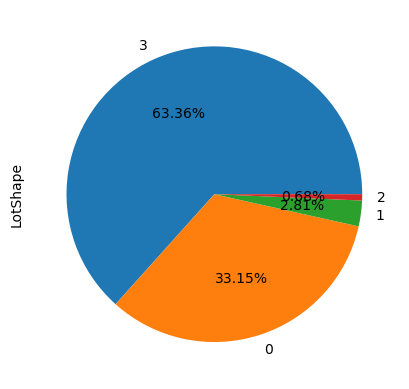

In [39]:
housetrain_df.LotShape.value_counts().plot(kind='pie',autopct='%0.2f%%')

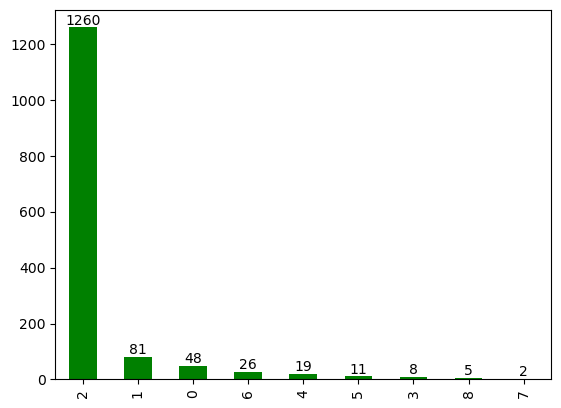

In [40]:
ax=housetrain_df.Condition1.value_counts().plot(kind='bar',color='g')
for i in ax.containers:
    ax.bar_label(i)

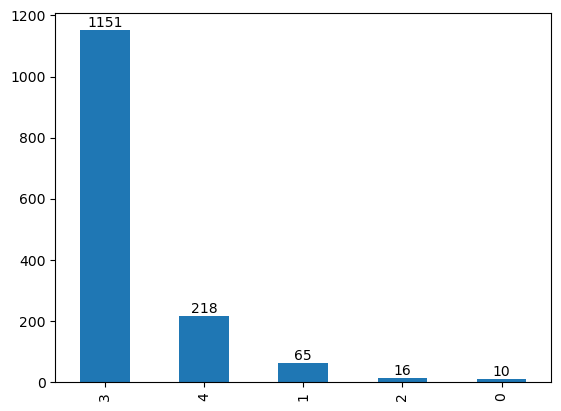

In [41]:
ax=housetrain_df.MSZoning.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: ylabel='Alley'>

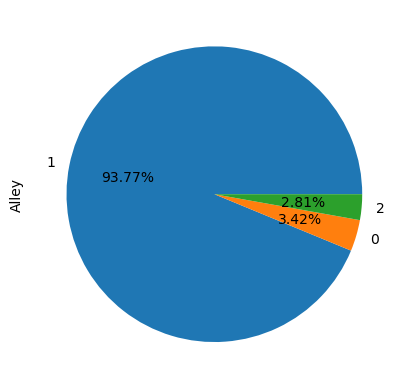

In [42]:
housetrain_df.Alley.value_counts().plot(kind='pie',autopct='%0.2f%%')

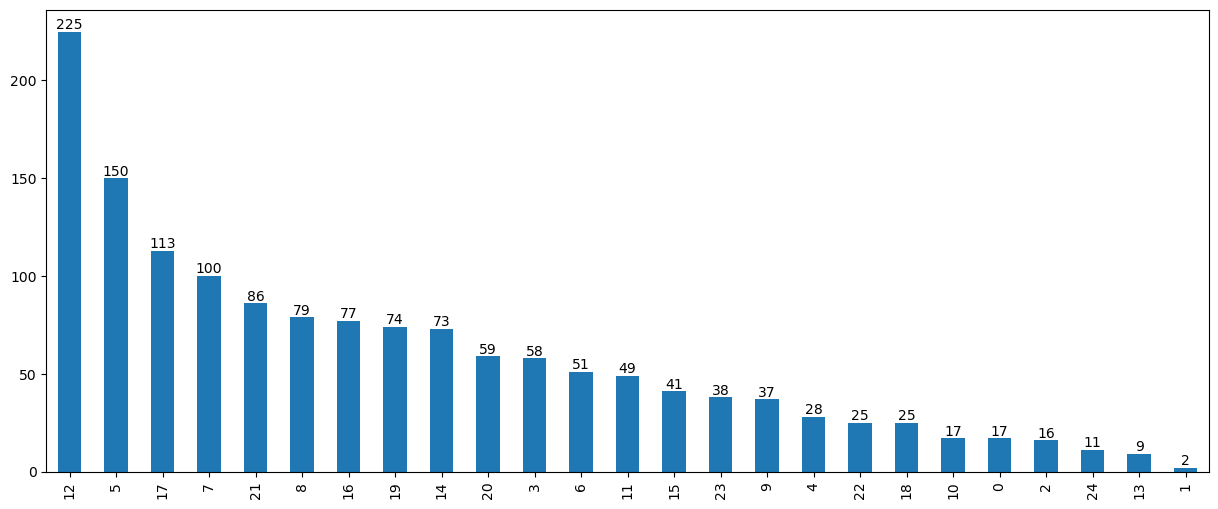

In [43]:
plt.figure(figsize=(15,6))
ax=housetrain_df.Neighborhood.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

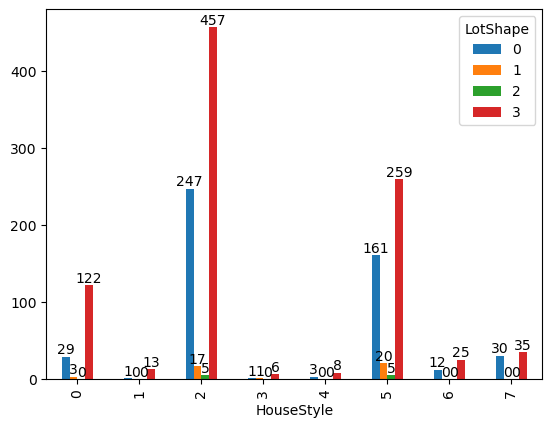

In [44]:
ax=pd.crosstab(housetrain_df.HouseStyle,housetrain_df.LotShape).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

HYPOTHESIS TESTING

In [56]:
housetrain_df.SalePrice=housetrain_df.SalePrice.astype(np.number)

C:\Users\swati\AppData\Local\Temp\ipykernel_4280\217185757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housetrain_df.SalePrice=housetrain_df.SalePrice.astype(np.number)


In [57]:
#Test Null Average Salesprice of centralair Yes/No Equal
housetrain_df.SalePrice.groupby(housetrain_df.CentralAir).mean()

CentralAir
0    105264.073684
1    186186.709890
Name: SalePrice, dtype: float64

In [58]:
housetrain_df.SalePrice.groupby(housetrain_df.CentralAir).var()

CentralAir
0    1.654153e+09
1    6.210261e+09
Name: SalePrice, dtype: float64

In [59]:
yes=housetrain_df[housetrain_df.CentralAir==0]
no=housetrain_df[housetrain_df.CentralAir==1]

In [60]:
from scipy.stats import ttest_ind

In [61]:
ttest_ind(yes.SalePrice,no.SalePrice,equal_var=False)
# since pvalue=2.280814388186851e-37 is lessthan 0.05,reject null hypothesis

Ttest_indResult(statistic=-17.267772563668995, pvalue=2.280814388186851e-37)

In [62]:
#Test Null Average Salesprice of PavedDrive
housetrain_df.SalePrice.groupby(housetrain_df.PavedDrive).mean()

PavedDrive
0    115039.122222
1    132330.000000
2    186433.973881
Name: SalePrice, dtype: float64

In [63]:
housetrain_df.SalePrice.groupby(housetrain_df.PavedDrive).var()

PavedDrive
0    1.967146e+09
1    1.122453e+09
2    6.346592e+09
Name: SalePrice, dtype: float64

In [65]:
zero=housetrain_df[housetrain_df.PavedDrive==0]
one=housetrain_df[housetrain_df.PavedDrive==1]
two=housetrain_df[housetrain_df.PavedDrive==2]

In [66]:
from scipy.stats import f_oneway

In [67]:
f_oneway(zero.SalePrice,one.SalePrice,two.SalePrice)
# since pvalue=1.803568890651533e-18 is lessthan 0.05,reject null hypothesis

F_onewayResult(statistic=42.02417941762533, pvalue=1.803568890651533e-18)

In [68]:
#Test Null No Association between Bldgtype and landslope
pd.crosstab(housetrain_df.BldgType,housetrain_df.LandSlope)

LandSlope,0,1,2
BldgType,,,
0,1150,58,12
1,27,3,1
2,51,1,0
3,43,0,0
4,111,3,0


In [69]:
from scipy.stats import chi2_contingency

In [70]:
chi2_contingency(pd.crosstab(housetrain_df.BldgType,housetrain_df.LandSlope))
# since pvalue=0.2629395436820786 is greater than 0.05, failed to reject null hypothesis

Chi2ContingencyResult(statistic=10.029814767578731, pvalue=0.2629395436820786, dof=8, expected_freq=array([[1.15482192e+03, 5.43150685e+01, 1.08630137e+01],
       [2.93438356e+01, 1.38013699e+00, 2.76027397e-01],
       [4.92219178e+01, 2.31506849e+00, 4.63013699e-01],
       [4.07027397e+01, 1.91438356e+00, 3.82876712e-01],
       [1.07909589e+02, 5.07534247e+00, 1.01506849e+00]]))

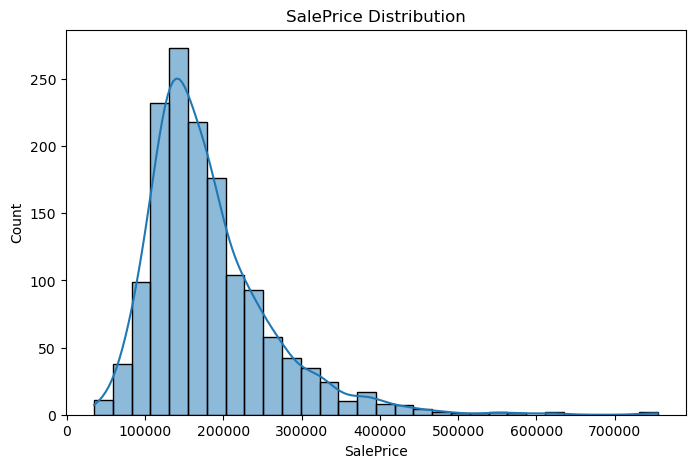

In [72]:
plt.figure(figsize=(8, 5))
sns.histplot(housetrain_df['SalePrice'], bins=30, kde=True)
plt.title('SalePrice Distribution')
plt.show()

In [77]:
#Split data into dependent variable(y) & Independent Variables(X)
y=housetrain_df.SalePrice
X=housetrain_df.drop(['Id','SalePrice'],axis=1)

In [78]:
y=y.astype('int64')

<Axes: ylabel='Frequency'>

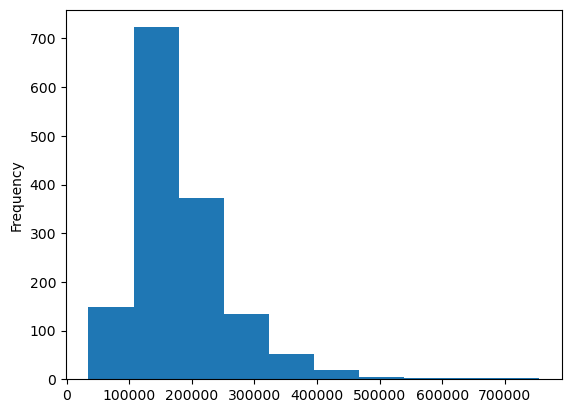

In [79]:
# Histogram, Boxplot & density curve of y
y.plot(kind="hist") # Positive Skewness

<Axes: >

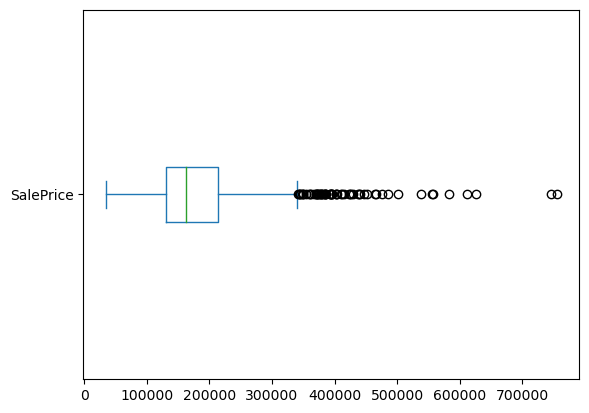

In [80]:
y.plot(kind="box",vert=False)

<Axes: ylabel='Density'>

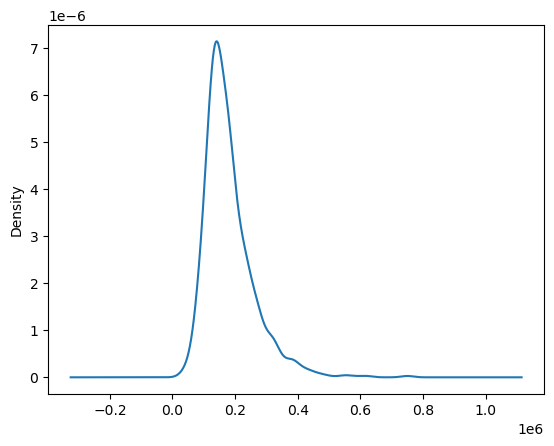

In [81]:
y.plot(kind="density")

<Axes: ylabel='Density'>

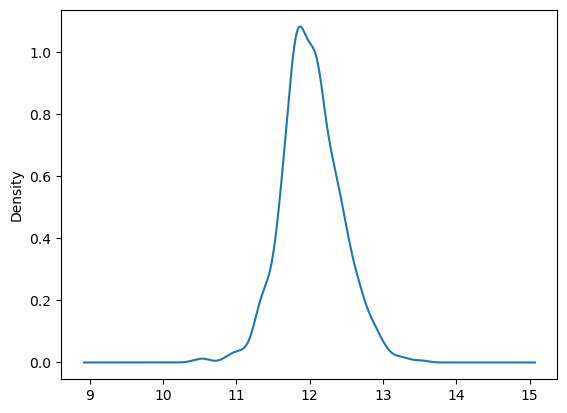

In [82]:
# Logarthmic Transformation
np.log1p(y).plot(kind="density")

LINEAR REGRESSION

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
reg=LinearRegression()

In [85]:
regmodel=reg.fit(X,np.log(y))

In [86]:
regmodel.score(X,np.log(y)) # R Square 

0.887774060265907

In [87]:
housetest_df=housetest_df.drop('Id',axis=1)

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
cross_val_score(reg,X,np.log(y))

array([0.89385005, 0.86134518, 0.88481534, 0.88269678, 0.72781731])

In [128]:
np.mean([0.89385005, 0.86134518, 0.88481534, 0.88269678, 0.72781731])

0.850104932

In [129]:
regpred_X=regmodel.predict(X)

In [130]:
regresid=y-regpred_X # residual

In [131]:
np.sqrt(np.mean(regresid**2)) # RMSE

197572.42530485906

In [132]:
regpredict=regmodel.predict(housetest_df)

In [133]:
pd.DataFrame(np.exp(regpredict)).to_csv("reg.csv")

DECISION TREE

In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [135]:
tree=DecisionTreeRegressor(max_depth=8)

In [136]:
treemodel=tree.fit(X,y)

In [137]:
treemodel.score(X,y)

0.960150957255043

In [138]:
cross_val_score(tree,X,y)

array([0.72881341, 0.69231549, 0.81727062, 0.63461755, 0.59099412])

In [140]:
np.mean([0.72881341, 0.69231549, 0.81727062, 0.63461755, 0.59099412])

0.6928022379999998

In [141]:
treepredict=treemodel.predict(housetest_df)

In [142]:
pd.DataFrame(treepredict).to_csv("Tree1.csv")

GRADIENT BOOSTING

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
gbm=GradientBoostingRegressor()

In [191]:
gbmmodel=gbm.fit(X,np.log(y))

In [146]:
gbm.score(X,y)

0.9637247366788599

In [192]:
gbmmodel.score(X,np.log(y)) #r_square

0.9564765395111616

In [193]:
cross_val_score(gbm,X,np.log(y))

array([0.90966172, 0.89441639, 0.89596835, 0.90472231, 0.89031023])

In [194]:
np.mean([0.90966172, 0.89441639, 0.89596835, 0.90472231, 0.89031023])

0.8990157999999999

In [195]:
gbmpredict_X=gbmmodel.predict(X)

In [196]:
gbmresid=y-gbmpredict_X #residual

In [197]:
np.sqrt(np.mean(gbmpredict_X**2)) #RMSE

12.030173092703963

In [198]:
gbmpredict=gbmmodel.predict(housetest_df)

In [200]:
pd.DataFrame(gbmpredict).to_csv("gbm1.csv")

In [149]:
# Variable or Feature Importance
pd.DataFrame(treemodel.feature_importances_,
             X.columns).sort_values(by=0,ascending=False)

,0
OverallQual,0.662407
GrLivArea,0.104447
2ndFlrSF,0.038403
TotalBsmtSF,0.032970
BsmtFinSF1,0.023620
1stFlrSF,0.020668
Neighborhood,0.015199
GarageCars,0.012973
GarageArea,0.010270
LotFrontage,0.007491


LASSO REGRESSION

In [151]:
lasso_params={'alpha':[0.5,0.25,1,2,3,4,5,10,15]}

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [153]:
lasso_grid=GridSearchCV(estimator=Lasso(max_iter=3000,
                                       selection="random"),
                        param_grid=lasso_params).fit(X,y)

C:\Users\swati\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+11, tolerance: 6.990e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\swati\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(


In [154]:
lasso_grid.best_estimator_

Lasso(alpha=15, max_iter=3000, selection='random')

In [155]:
lasso_grid.best_score_

0.800102794096832

In [156]:
lasso_gridmodel=lasso_grid.fit(X,y)

In [157]:
lasso_gridmodel.score(X,y)

0.8529921331577822

In [158]:
lassoprdict=lasso_gridmodel.predict(housetest_df)

In [159]:
pd.DataFrame(lassoprdict).to_csv("lasso1.csv")

RIDGE REGRESSION

In [162]:
from sklearn.linear_model import Ridge

In [163]:
clf=Ridge(alpha=1)

In [164]:
rid=clf.fit(X,y)

In [165]:
rid.score(X,y)

0.8528699626960012

In [166]:
ridpredict=rid.predict(housetest_df)

In [167]:
pd.DataFrame(ridpredict).to_csv("rid.csv")

RANDOM FOREST

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
Rf=RandomForestRegressor(n_estimators=3000)

In [175]:
rfmodel=Rf.fit(X,y)

In [176]:
rfmodel.score(X,y)

0.9821319234863151

In [177]:
rfpredict=rfmodel.predict(housetest_df)

In [178]:
pd.DataFrame(rfpredict).to_csv("rf.csv")

KNN

In [179]:
from sklearn.neighbors import KNeighborsRegressor

In [180]:
knn=KNeighborsRegressor(n_neighbors=2)

In [181]:
knnmodel=knn.fit(X,np.log(y))

In [182]:
knnmodel.score(X,np.log(y)) #r_square

0.8793709816863403

In [183]:
cross_val_score(knn,X,np.log(y))

array([0.66967678, 0.61134509, 0.65382813, 0.64065939, 0.55151859])

In [184]:
np.mean([0.66967678, 0.61134509, 0.65382813, 0.64065939, 0.55151859])

0.625405596

In [185]:
knnpredict_X=knnmodel.predict(X)

In [186]:
knnresid=y-knnpredict_X #Residual

In [187]:
np.sqrt(np.mean(knnresid**2)) #RMSE

197572.42723875088

In [188]:
knnpredict=knnmodel.predict(housetest_df)

In [189]:
pd.DataFrame(np.exp(knnpredict)).to_csv('knn.csv')

Validating the scores in Kaggle

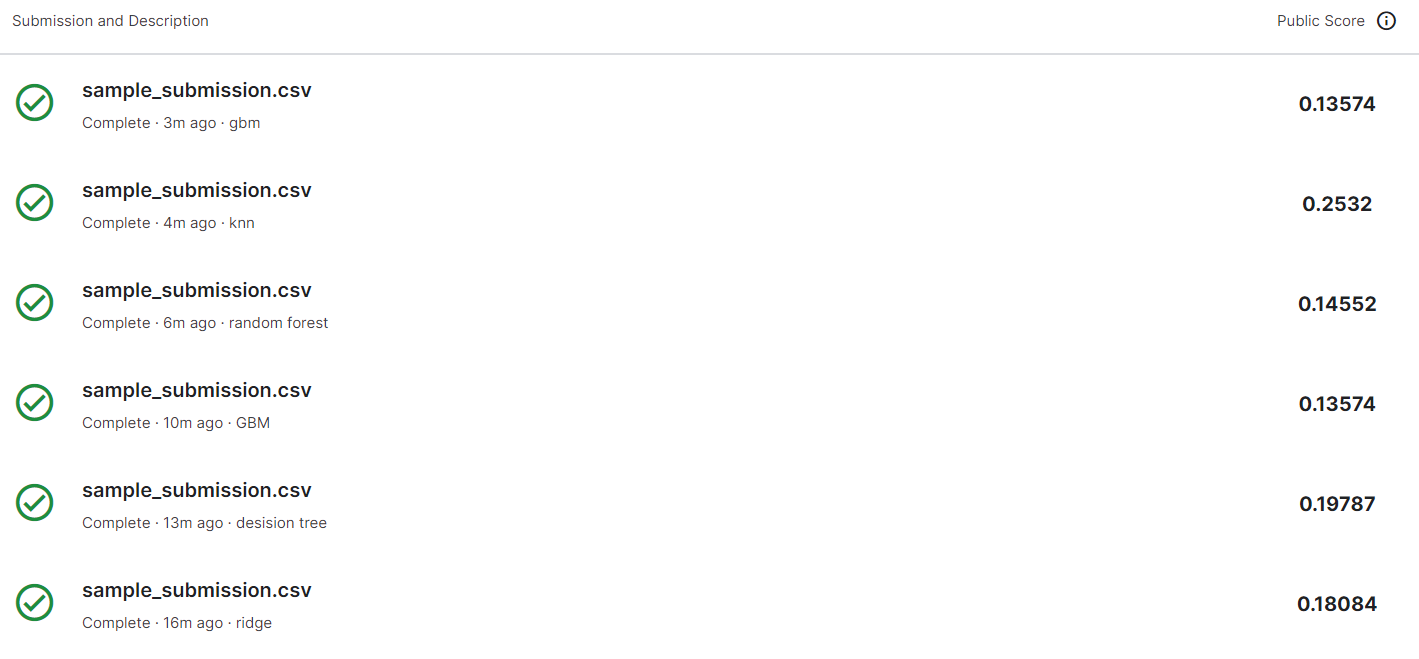

Leaderboard of the competition

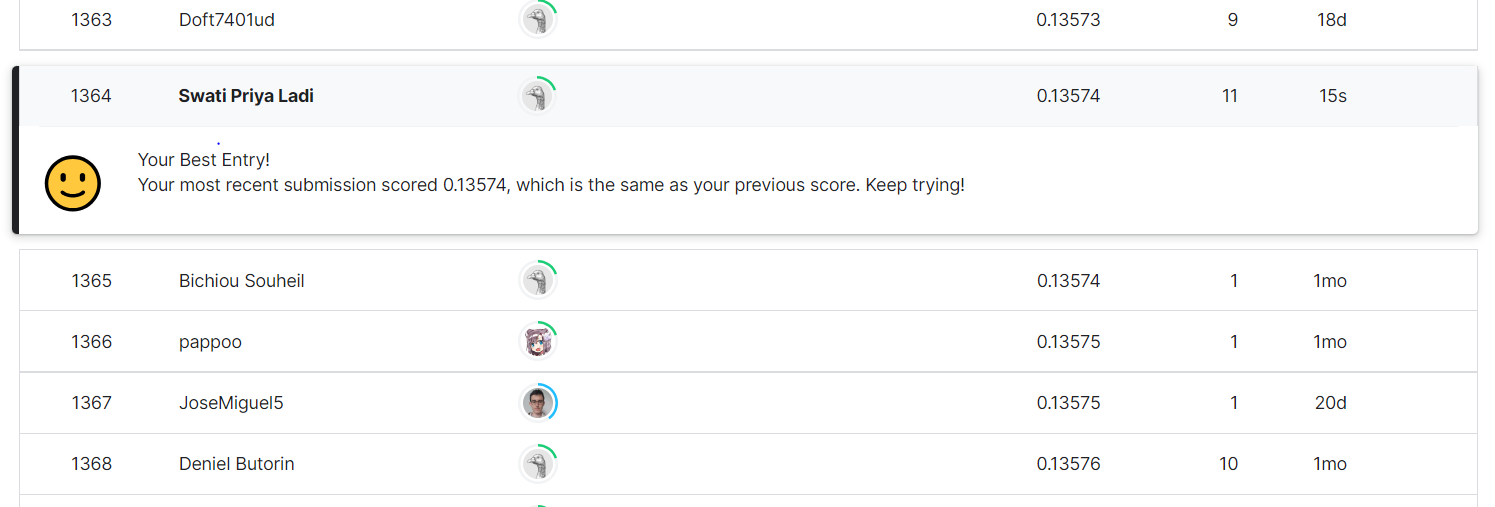

Summary

The "Gradient Boosting Machines" model exhibits greater prediction ability for this dataset, as evidenced by its significantly lower RMSE score when compared to its peers. The Gradient Boosting Machines model produces predictions that are more closely aligned with actual outcomes, even though it has a lower accuracy score. This is especially useful for regression problems where numerical prediction accuracy is critical.

Given these results, the Gradient Boosting Machines model should be prioritized as the key performance indicator scores for regression analysis on the House Prices dataset, since it is a more dependable alternative.

